<p style="font-family: Cambria; text-align: center; font-size: 48px;"> EDA (Exploratory Data Analysis)
<p style="font-family: Cambria; text-align: center; font-size: 45px;">Univariate Analysis

<p style="font-family: Cambria; font-size: 22px;"><b>What is Univariate Analysis?

Definition: Univariate analysis focuses on analyzing a single variable at a time.

Purpose: To understand the variable's distribution, central tendency, and spread.

Univariate analysis is the process of analyzing each variable individually to understand its distribution, characteristics, and potential data issues. It does not examine relationships between variables. It is an essential step in Exploratory Data Analysis (EDA) and helps in identifying missing values, skewness, outliers, and class imbalance.

In the Adult dataset, univariate analysis is performed on all features to understand their individual behavior before proceeding to further analysis or model building.

<p style="font-family: Cambria; font-size: 22px;"><b> What Do We Check in Univariate Analysis?

1)Numerical Variables

Techniques (Descriptive Statistics):Minimum (Min),Maximum (Max),Mean,Median,Mode,Range,Standard Deviation,Quantiles (Q1, Q2, Q3),Skewness

Visualizations:Histogram,Box Plot,Density Plot

Examples from Adult Dataset:age,hours-per-week,capital-gain,capital-loss,education-num,fnlwgt

These help us understand:

1)Whether the data is normally distributed

2)Whether extreme values (outliers) exist

3)Whether the data is skewed

4)The overall spread of the variable

2)Categorical Variables

Techniques:Frequency Count,Percentage Distribution,Mode (most frequent category)

Visualizations:Bar Chart,Count Plot

Examples from Adult Dataset:sex,workclass,education,marital-status,occupation,native-country,income

These help us understand:

1)Which category is dominant

2)Whether class imbalance exists (especially in income)

3)If any category has very few observations

<p style="font-family: Cambria; font-size: 22px;"><b>Why Univariate Analysis is Important?

1)Detects missing values

2)Identifies skewed distributions

3)Detects outliers

4)Identifies class imbalance

5)Helps decide data cleaning strategies

6)Prepares data for further analysis (Bivariate & Multivariate)

<p style="font-family: Cambria; font-size: 22px;"><b>Step 1 : Installing all the required libraries

In [2]:
!pip install pandas numpy matplotlib seaborn scipy scikit-learn

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical testing
from scipy.stats import ttest_ind, chi2_contingency, zscore

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Display all columns
pd.set_option('display.max_columns', None)

# Improve plot appearance
sns.set(style="whitegrid")

# Avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [148]:

# Load the cleaned dataset
df_train_test = pd.read_csv('/Users/akhilamaheedhara/Desktop/cleaned_adult.csv')

# Quick check
df_train_test.head()
df_train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
 15  income_num      48842 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 6.0+ MB


<p style="font-family: Cambria; font-size: 22px;"><b> Divided Univariate Analysis into two

    1)Numerical Features
    
    2)Categorical Features

<p style="font-family: Cambria; text-align: center; font-size: 45px;">Univariate Analysis — Numerical Features

<p style="font-family: Cambria; font-size: 22px;"><b> A) Histograms (Distribution)

In [102]:
num_cols = ['age', 'fnlwgt', 'education-num', 
            'capital-gain', 'capital-loss', 'hours-per-week','income_num']

In [164]:
df_train_test['age_group'] = pd.cut(
    df_train_test['age'],
    bins=[17, 25, 35, 45, 55, 65, 90],
    labels=['18-25','26-35','36-45','46-55','56-65','65+'],
    include_lowest=True
)


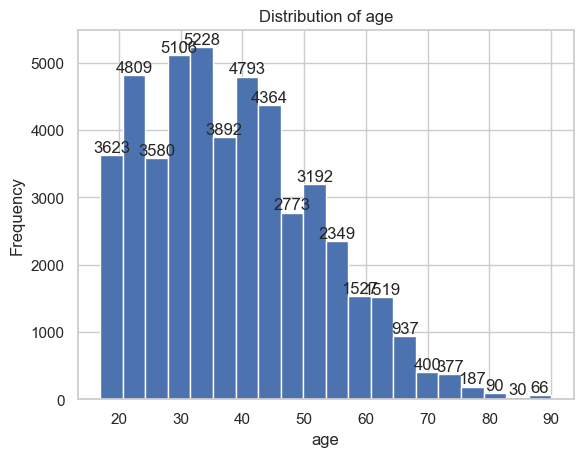

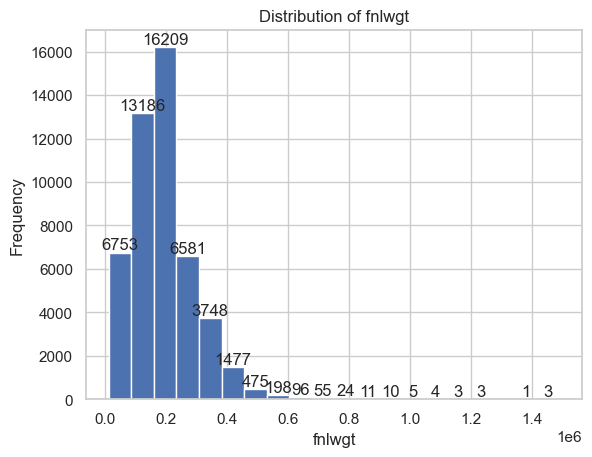

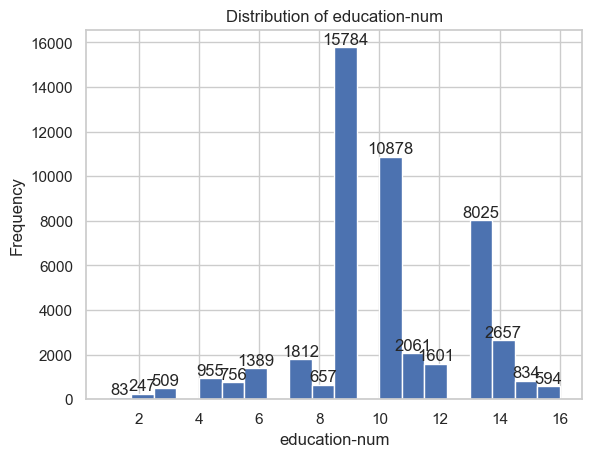

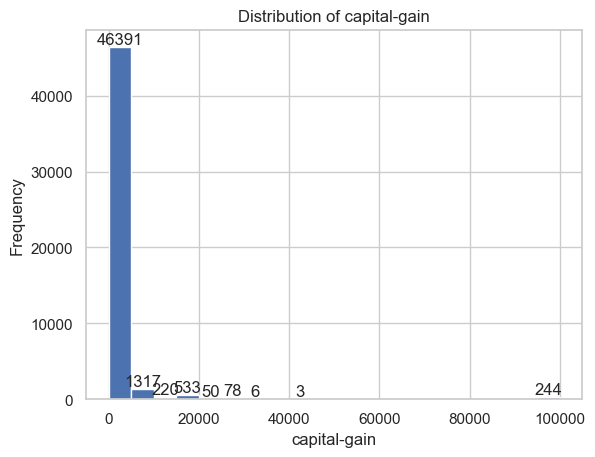

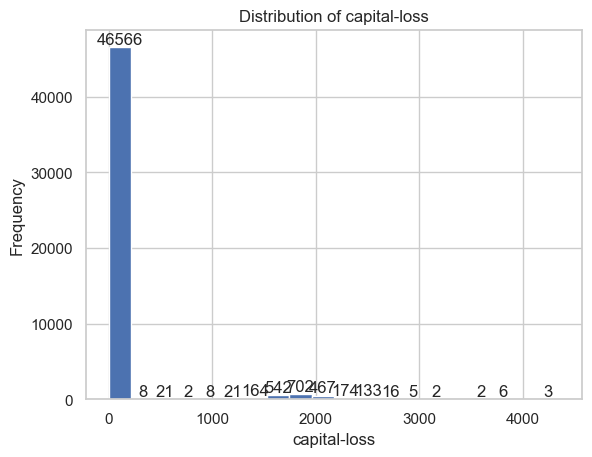

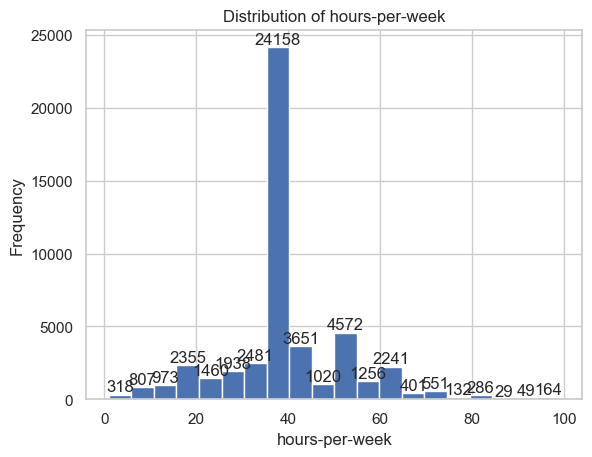

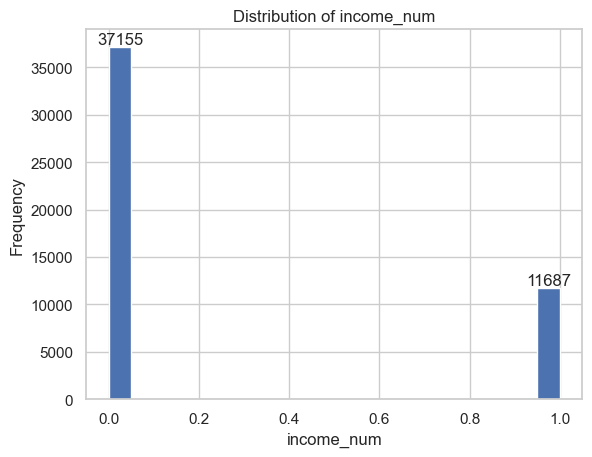

In [150]:
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure()
    counts, bins, patches = plt.hist(df_train_test[col], bins=20)

    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    for count, bin_left, patch in zip(counts, bins, patches):
        if count > 0:
            plt.text(
                bin_left + patch.get_width()/2,
                count,
                int(count),
                ha='center',
                va='bottom'
            )

    plt.show()

<p style="font-family: Cambria; font-size: 22px;"><b> B)BOXPLOTS (Outlier Visualiztion)

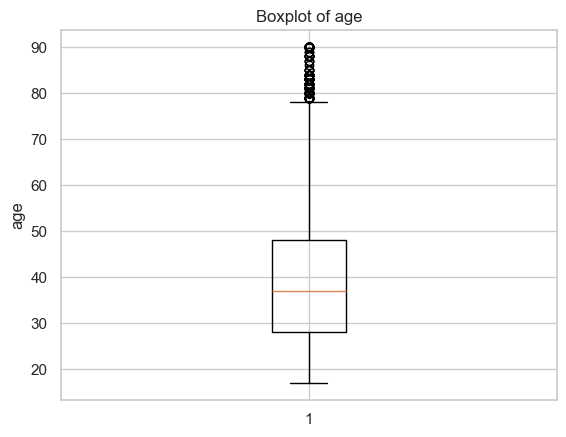

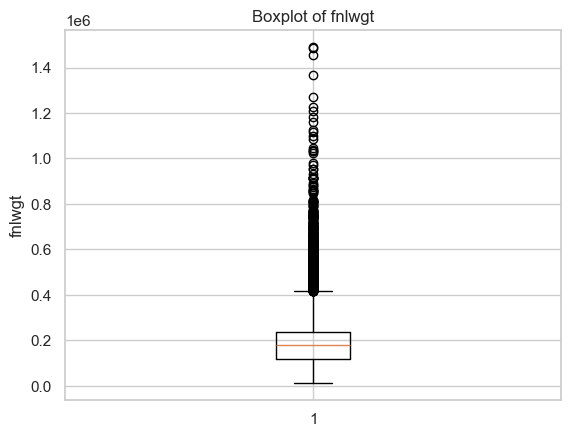

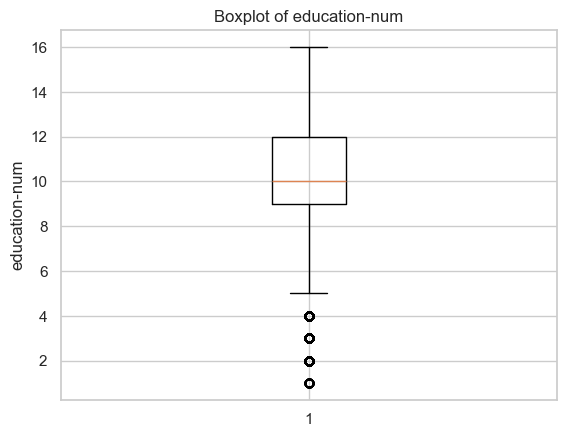

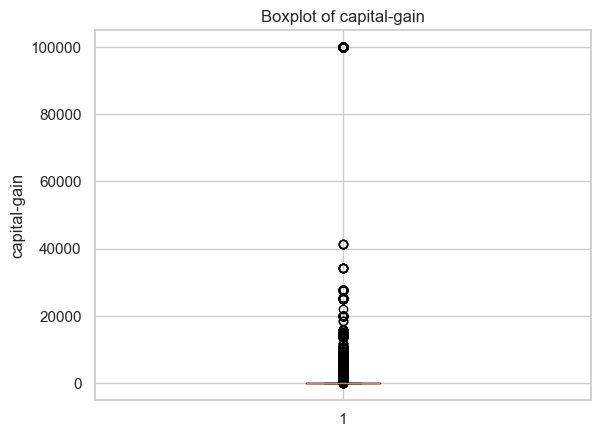

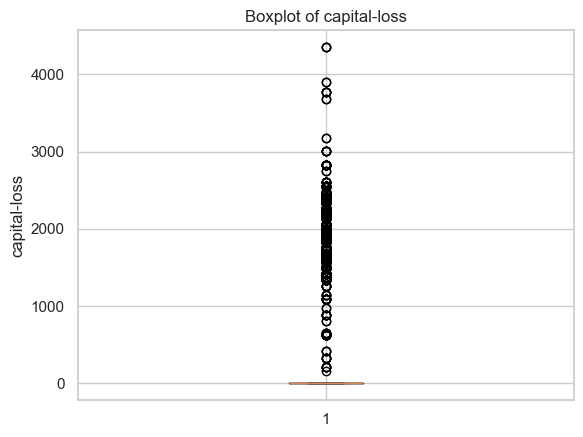

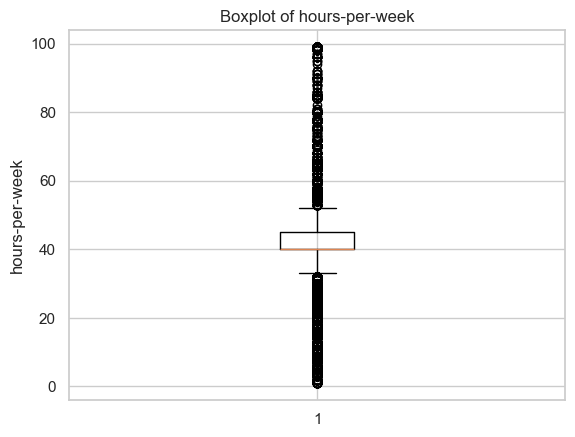

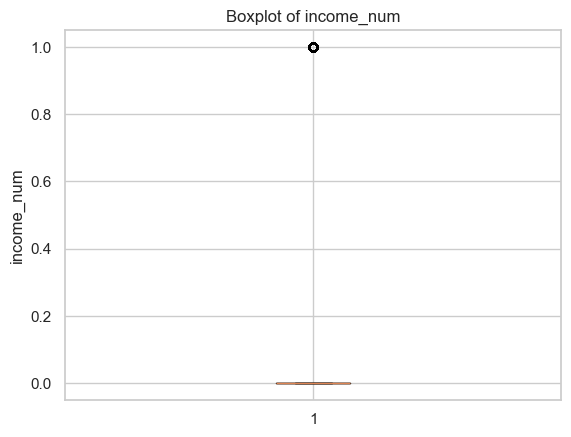

In [152]:
for col in num_cols:
    plt.figure()
    plt.boxplot(df_train_test[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

<p style="font-family: Cambria; font-size: 22px;"><b> C) Density Plot

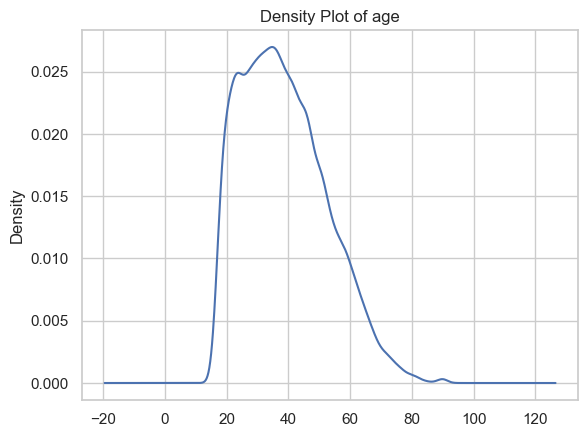

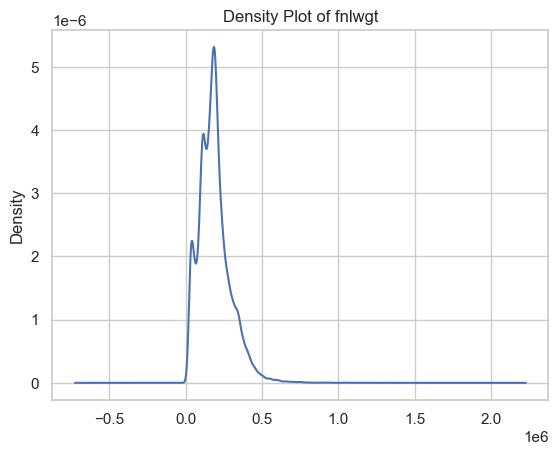

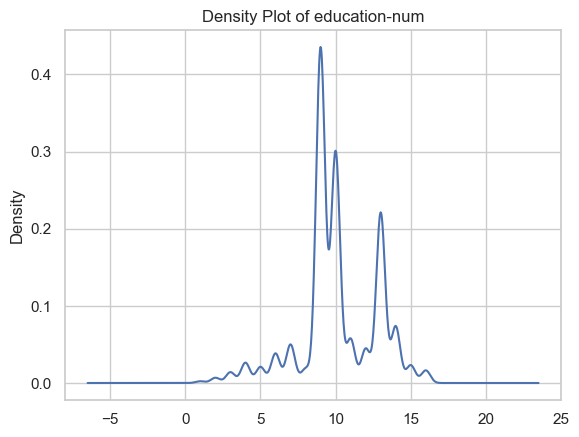

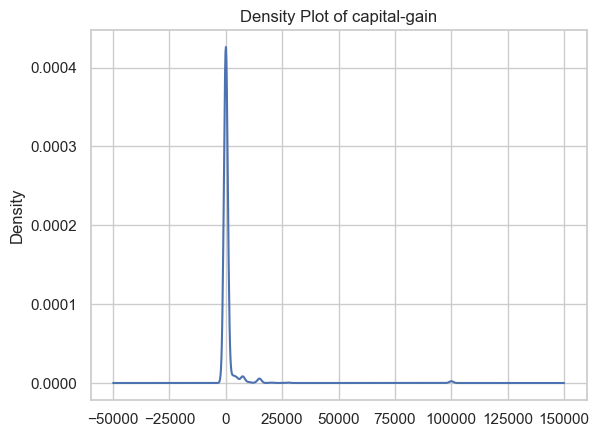

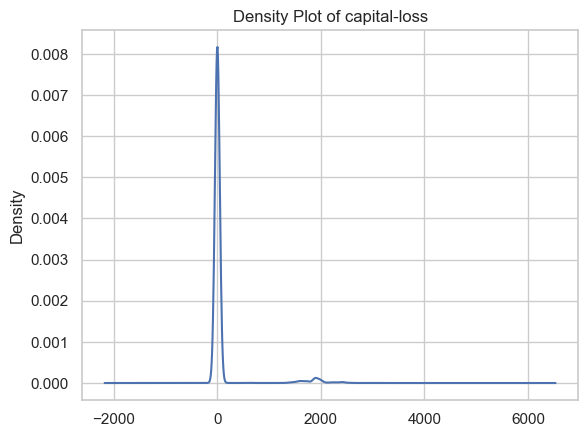

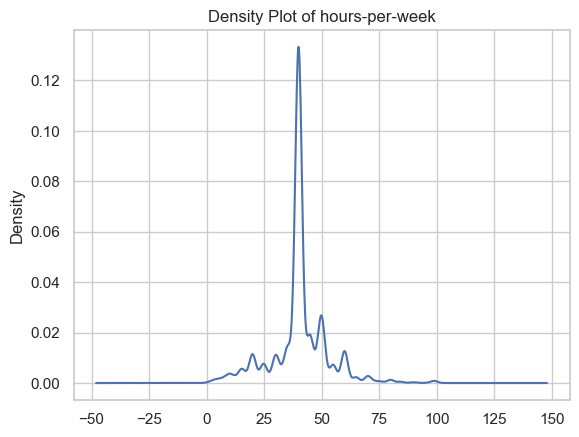

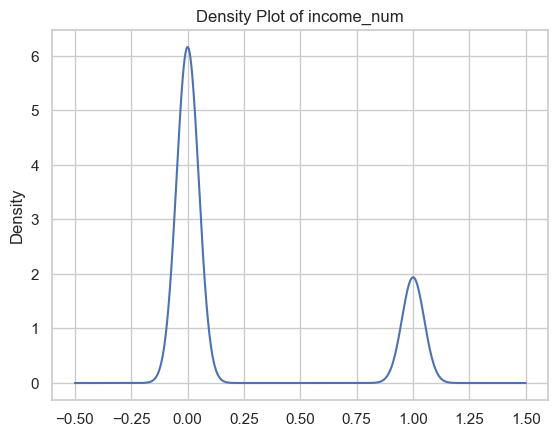

In [156]:
for col in num_cols:
    df_train_test[col].plot(kind='density')
    plt.title(f"Density Plot of {col}")
    plt.show()

<p style="font-family: Cambria; font-size: 28px;"><b> Histogram + Boxplot

A combined histogram and boxplot was used for each numerical feature to visualize distribution shape, central tendency, spread, and outliers simultaneously.

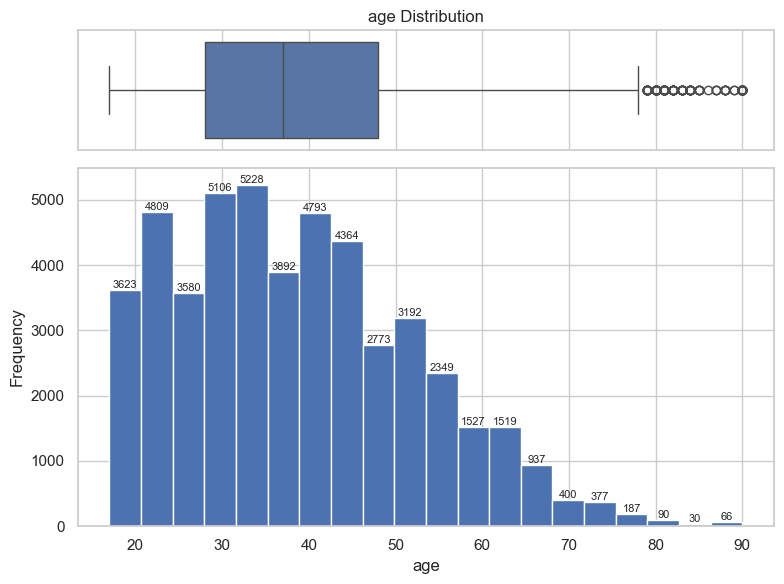

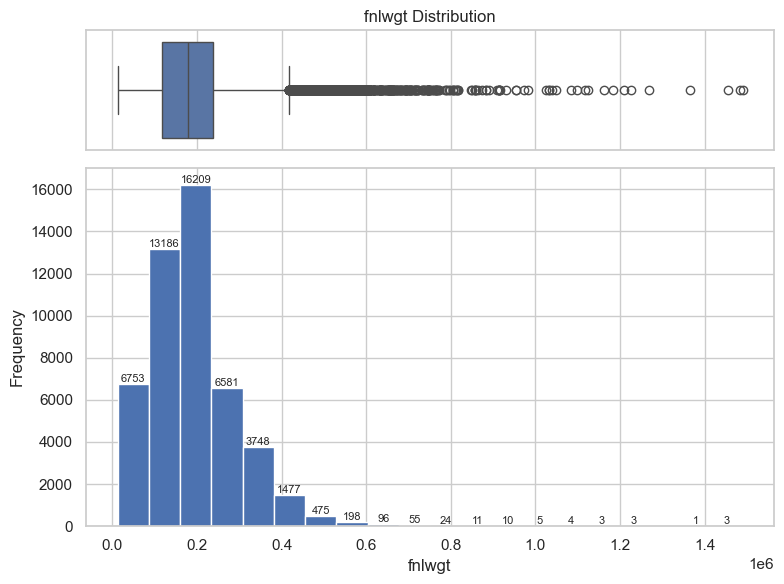

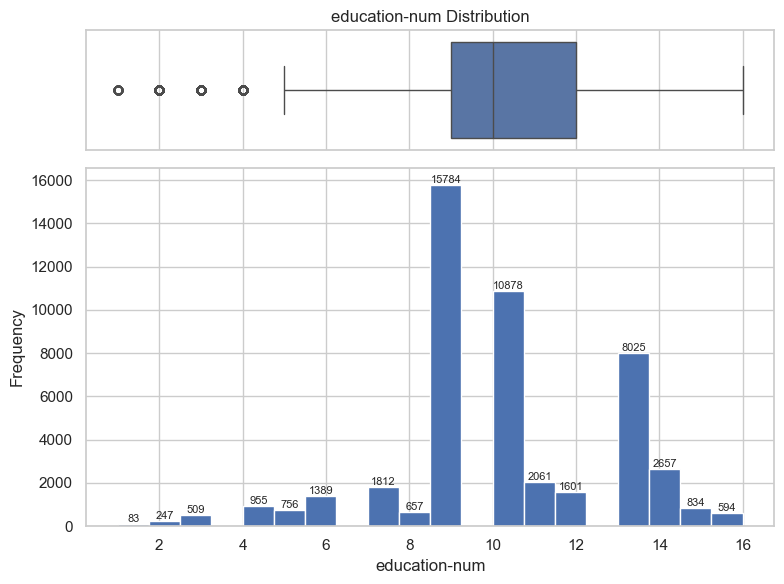

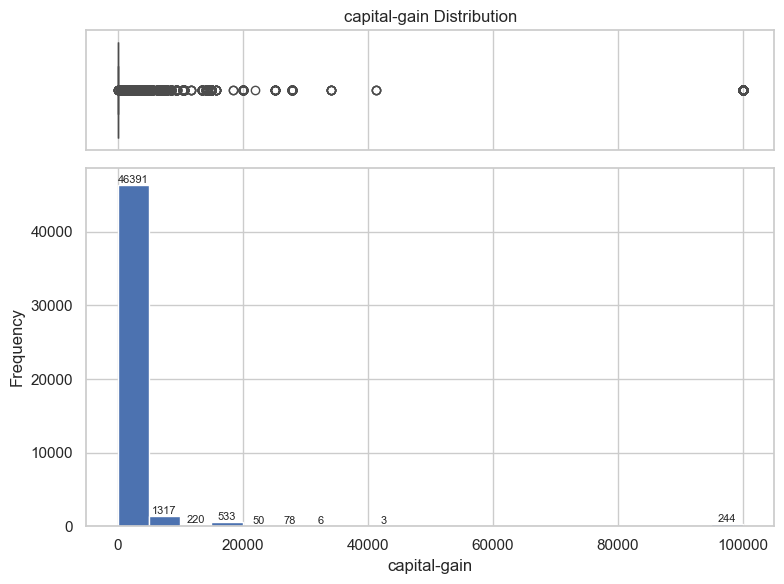

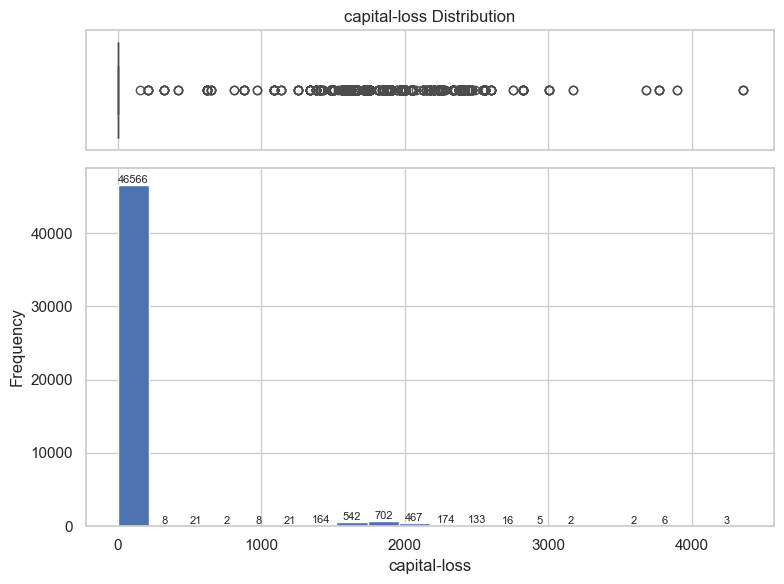

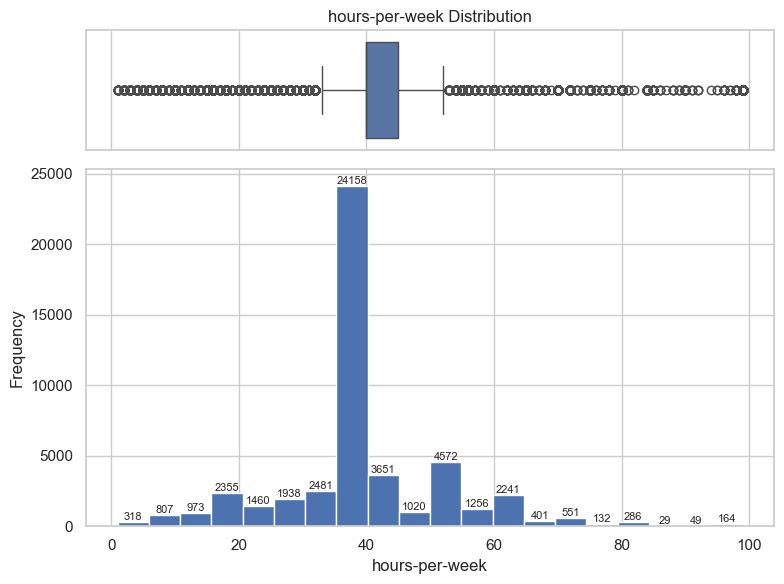

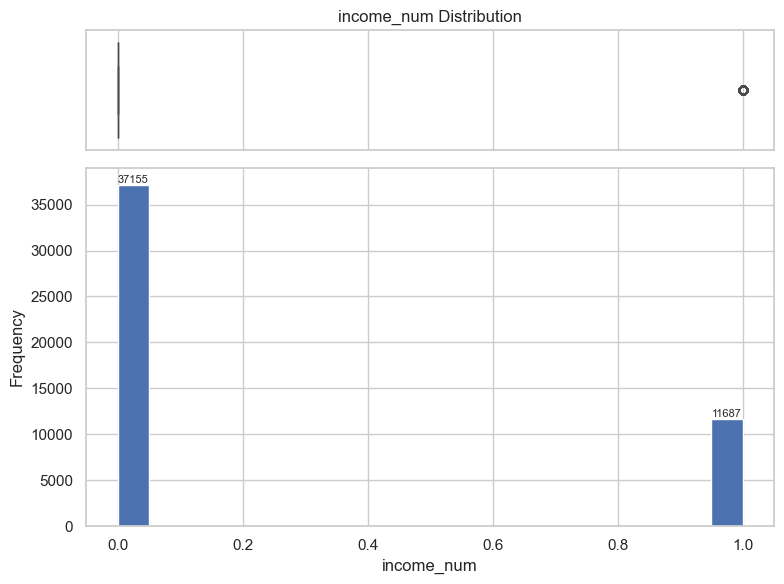

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['age', 'fnlwgt', 'education-num',
            'capital-gain', 'capital-loss',
            'hours-per-week', 'income_num']

for col in num_cols:
    
    fig, (ax_box, ax_hist) = plt.subplots(
        2, 
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=(8, 6)
    )

    # Boxplot (Top)
    sns.boxplot(x= df_train_test[col], ax=ax_box)
    ax_box.set(title=f"{col} Distribution")
    ax_box.set(yticks=[])

    # Histogram (Bottom)
    counts, bins, patches = ax_hist.hist( df_train_test[col], bins=20)

    ax_hist.set_xlabel(col)
    ax_hist.set_ylabel("Frequency")

    # Add count labels
    for count, bin_left, patch in zip(counts, bins, patches):
        if count > 0:
            ax_hist.text(
                bin_left + patch.get_width()/2,
                count,
                int(count),
                ha='center',
                va='bottom',
                fontsize=8
            )

    plt.tight_layout()
    plt.show()


<p style="font-family: Cambria; text-align: center; font-size: 48px;"> Numerical Variables Observations

<p style="font-family: Cambria; font-size: 22px;"><b> 

> Age

>> 1)Age ranges from 17 to 90 years.

>> 2)Majority of individuals fall between 25–50 years.

>> 3)Distribution is slightly right-skewed.

>> 4)Few higher-age values are statistically outliers but represent valid observations.

> fnlwgt

>> 1)Wide range with high variability.

>> 2)Distribution appears spread out with several extreme values.

>> 3)Since it represents census weighting, outliers are expected and retained.

> Education-num

>> 1)Ranges from 1 to 16.

>> 2)Most individuals have education levels around 9–13 years.

>> 3)Distribution is discrete and fairly concentrated.

>> 4)No significant extreme outliers observed.

>Capital-gain

>> 1)Highly right-skewed distribution.

>> 2)Majority of individuals have 0 capital gain.

>> 3)Small number of individuals have very high gains (e.g., 99999).

>> 4)Extreme values are valid economic variations.

>Capital-loss

>> 1)Similar pattern to capital-gain.

>> 2)Most values are 0.

>> 3)Few individuals report moderate to high losses.

>> 4)Strong right skew present.

>Hours-per-week

>> 1)Most individuals work around 40 hours per week.

>> 2)Distribution is slightly right-skewed.

>> 3)Some individuals work very few or very high hours (up to 99).

>> 4)Extreme values retained as valid cases.

>Income_num (Binary Target Variable)

>Encoded as:

>> 0 → ≤50K

>> 1 → >50K

>> 1)Majority of individuals belong to income ≤50K category.

>> 2)Dataset shows class imbalance, which may affect modeling.

<p style="font-family: Cambria; text-align: center; font-size: 45px;">Univariate Analysis — Categorical Features

In [24]:
cat_cols = ['workclass', 'education', 'marital-status',
            'occupation', 'relationship', 'race',
            'sex', 'native-country', 'income']


<p style="font-family: Cambria; font-size: 22px;"><b> Bar Chart

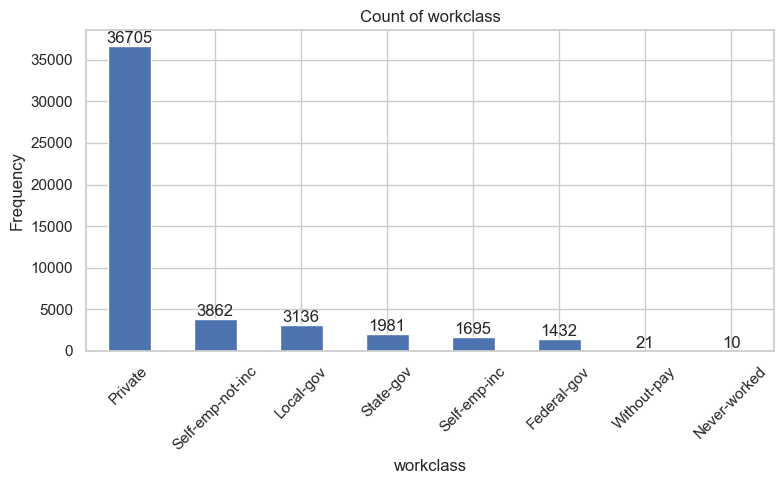

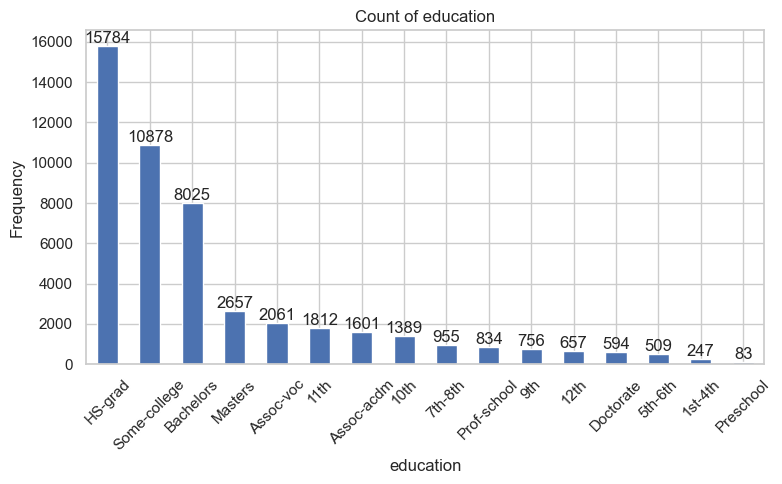

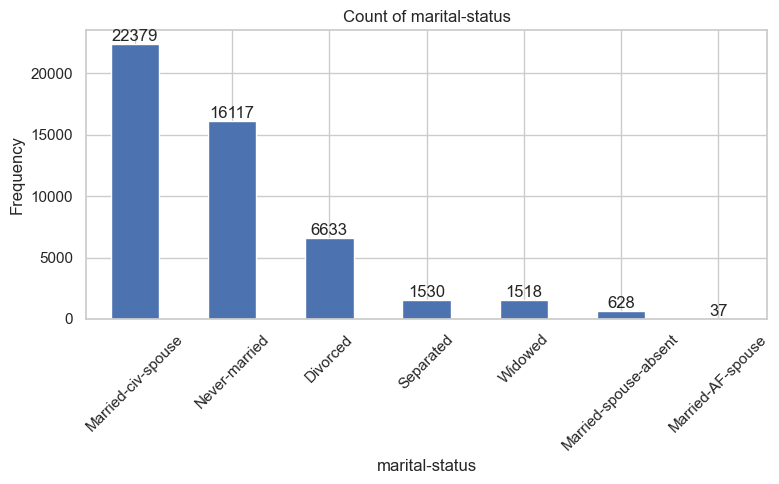

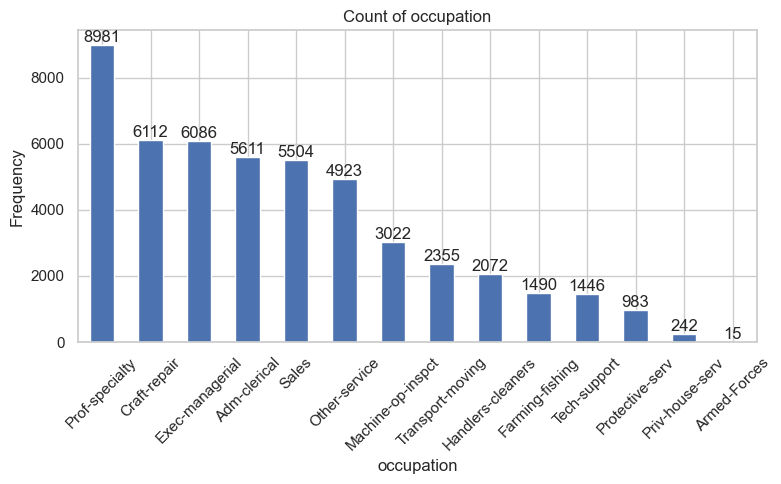

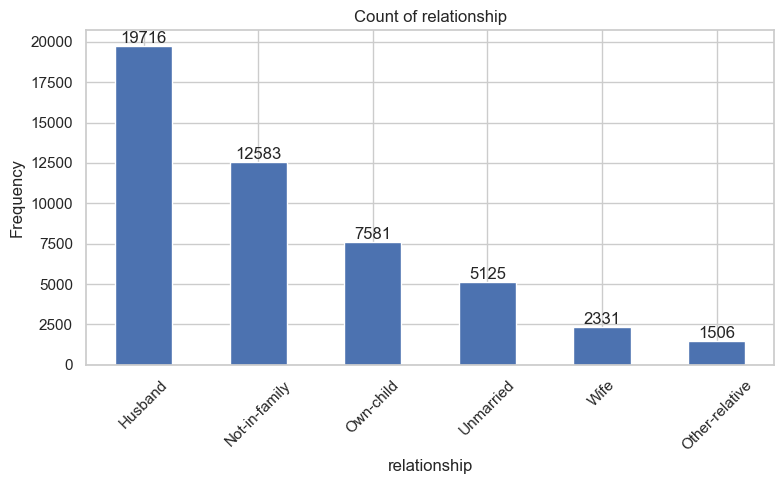

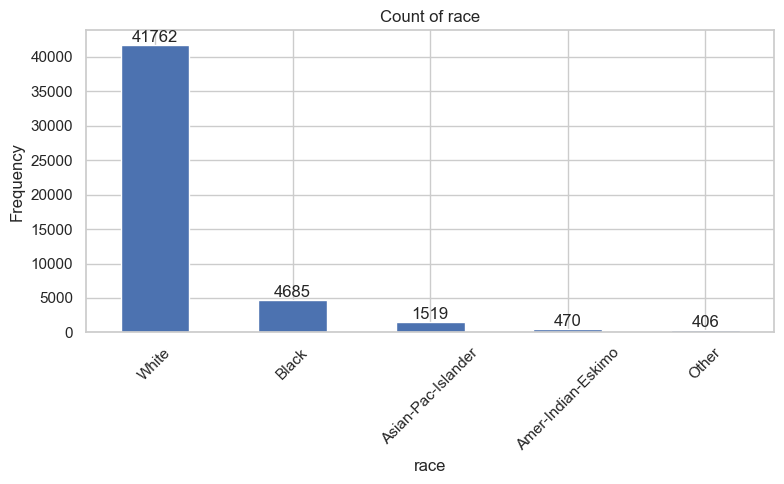

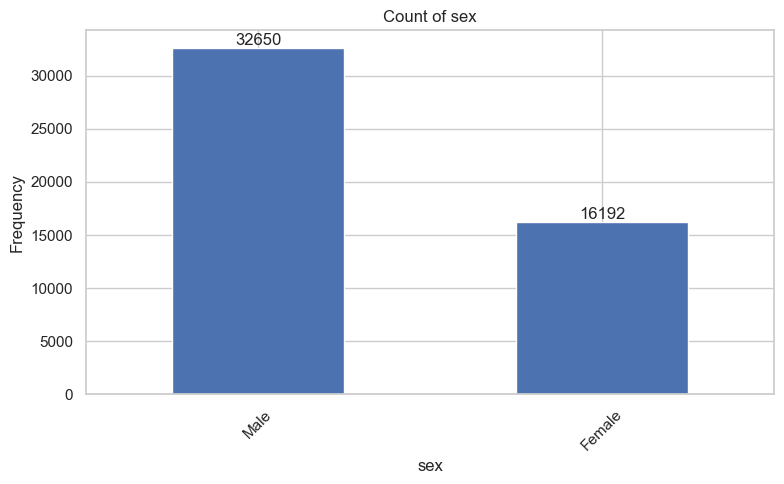

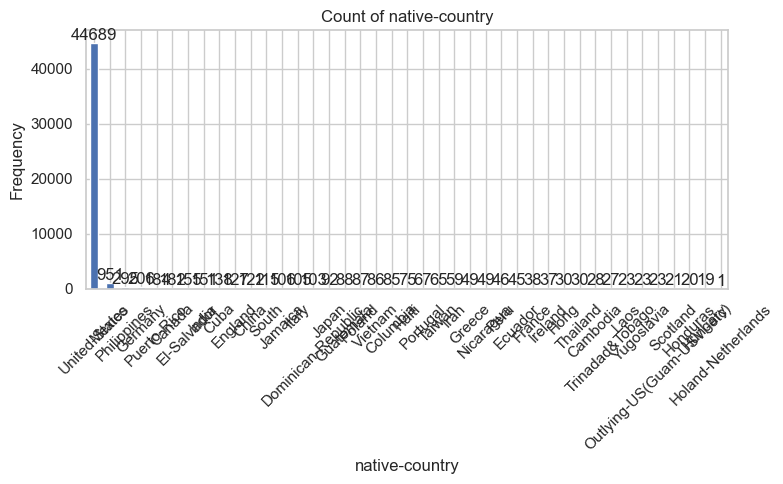

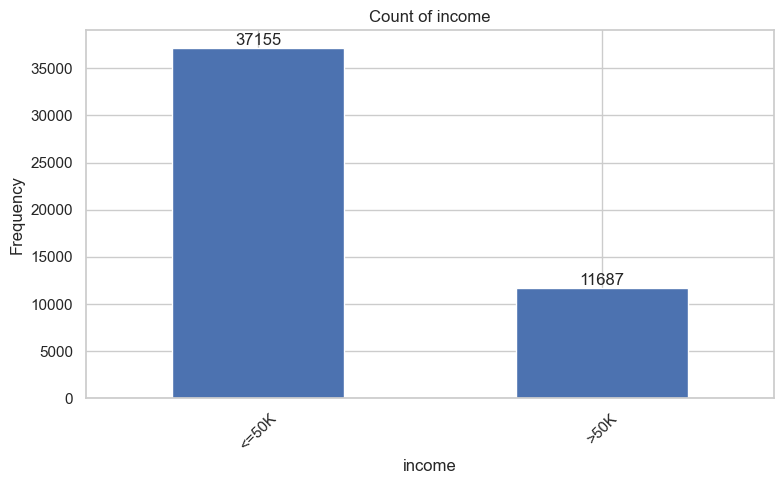

In [160]:
for col in cat_cols:
    plt.figure(figsize=(8, 5))
    
    counts =  df_train_test[col].value_counts()
    ax = counts.plot(kind='bar')
    
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)

    # Add count labels on bars
    for i in ax.patches:
        ax.annotate(str(int(i.get_height())),
                    (i.get_x() + i.get_width() / 2, i.get_height()),
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

<p style="font-family: Cambria; text-align: center; font-size: 48px;"> Categorical Variables – Observations
<p style="font-family: Cambria; font-size: 22px;"><b> 
    
> Workclass

>>1)Majority of individuals work in the Private sector.

>>2)Smaller proportions work in Government or Self-employed sectors.

> Education

>>1)Most common education levels:

>>2)HS-grad

>>3)Some-college

>>4)Bachelors

>>5)Lower frequency observed for advanced degrees.

>Marital-status

>>1)Most individuals are Married-civ-spouse.

>2)Significant proportion are Never-married.

>Occupation

>>1)Wide variety of occupations.

>>2)Most frequent categories include:

   >>a)Prof-specialty

   >>b)Craft-repair

   >>c)Exec-managerial

>Relationship

 >>Most individuals are categorized as:

>>1)Husband

>>2)Not-in-family

>>Reflects household structure patterns.

>Race

  >>1)Majority belong to the White category.

  >>2)Other racial groups have significantly smaller representation.

>Sex

  >>1)Higher proportion of males compared to females.

  >>2)Indicates gender imbalance in dataset.

>Native-country

  >>1)Majority of individuals are from the United States.

  >>2)Other countries have much smaller frequencies.

  >>3)Long-tail distribution observed.

>Income

  >>1)Majority earn ≤50K.

  >>2)Smaller proportion earn >50K.

  >>3)Indicates class imbalance in target variable.

<p style="font-family: Cambria; font-size: 22px;"><b> Native Country distribution - Horizantal bar chart with count

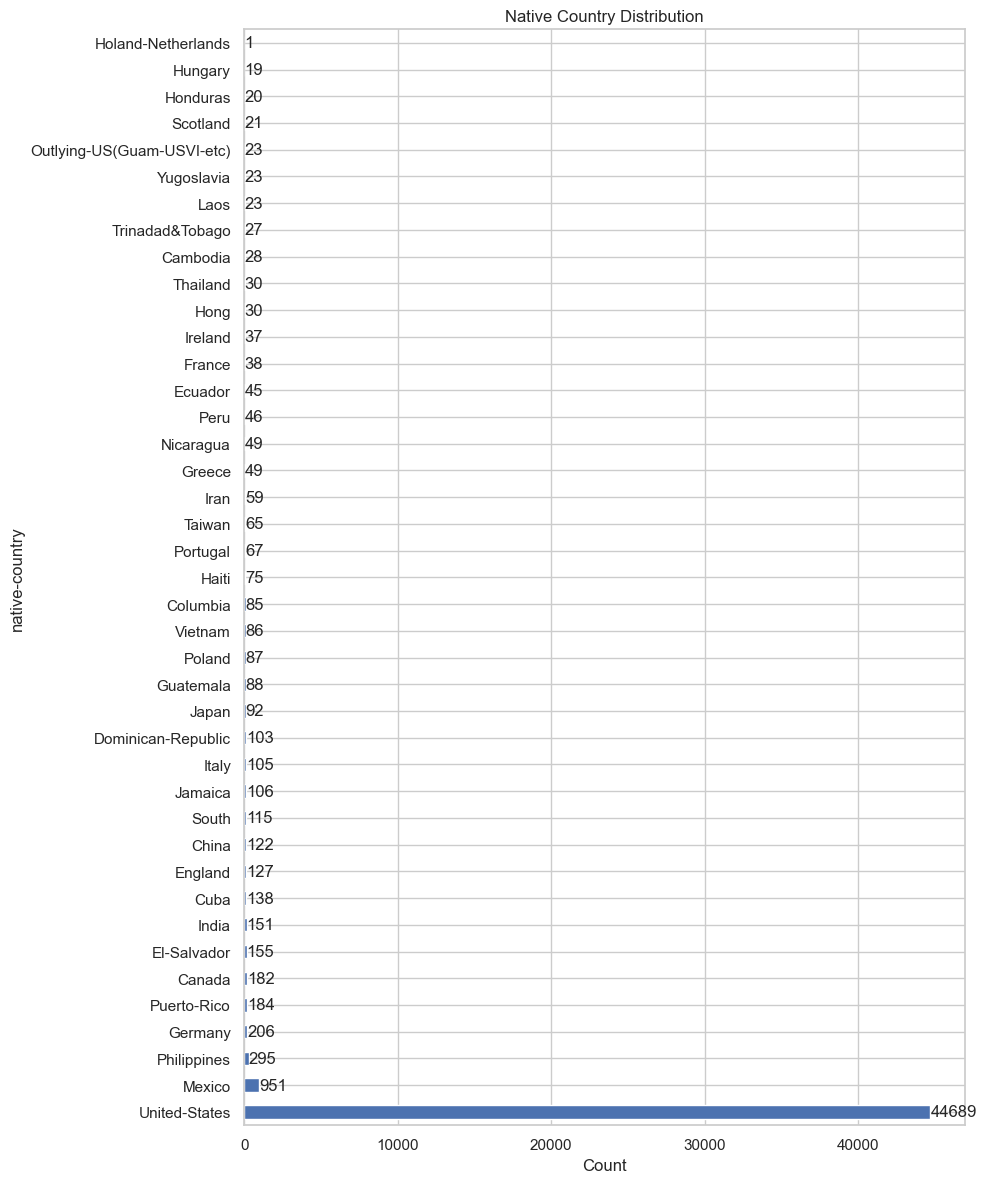

In [98]:
plt.figure(figsize=(10,12))

counts = df_cleaned['native-country'].value_counts()

ax = counts.plot(kind='barh')

plt.title("Native Country Distribution")
plt.xlabel("Count")

# Add labels
for p in ax.patches:
    ax.annotate(str(int(p.get_width())),
                (p.get_width(), p.get_y() + p.get_height()/2),
                ha='left', va='center')

plt.tight_layout()
plt.show()

<p style="font-family: Cambria;text-align: center;font-size: 28px;"><b> Conclusion

<p style="font-family: Cambria; font-size: 25px;"><b> The dataset exhibits skewness in economic variables such as capital-gain and capital-loss, while demographic variables like age and hours-per-week show moderate dispersion. Categorical features reveal dominance of private-sector employment, high school level education, and U.S.-based individuals. The income variable demonstrates class imbalance, which must be considered during model building.

In [166]:
print (df_train_test)

df_train_test.head()

       age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64           Private  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2              

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_num,age_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,36-45
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,46-55
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,36-45
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,46-55
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,26-35
